Counts per pixel from Image: 33.0
Alpha:  <bound method AlphaModel.alpha of <Models.AlphaModel object at 0x7f430c06d050>>
Rejection ratio:  0.32064128256513025
0.004442574595705174


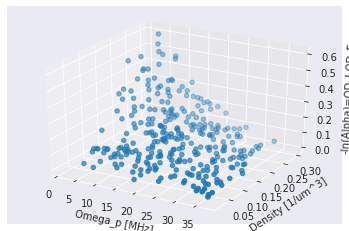

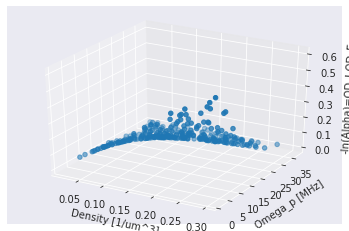

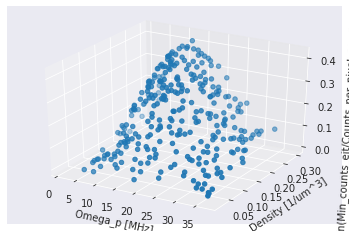

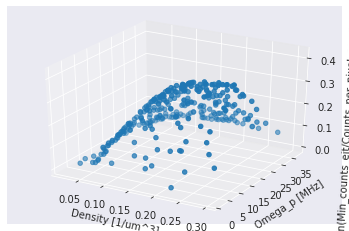

In [19]:
import pyfits
from scipy.ndimage import gaussian_filter
import scipy.optimize as opt
import numpy as np
import pylab as plt
import rydlab
import pandas as pd
import os
import copy
from lmfit import Model
from lmfit.models import LorentzianModel
from lmfit.models import ExponentialModel
from lmfit.models import ConstantModel
from lmfit import Parameters, minimize, report_fit, Model
from matplotlib.colors import LinearSegmentedColormap, to_rgb
import seaborn as sns
sns.set_style("dark")
sns.set_style("darkgrid")
import matplotlib as mpl
import scipy.integrate as integrate
import scipy.special as special
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import sys
import importlib


#Parameters in MHz
Omega_p=1
Omega_c=6
Gamma_e=6.01
C_3=414
C_6=527


cross_section=0.78*0.78 #um^2
n_0=1*10**(-1) #1/um^3 = 10^12 1/cm^3 = 10^18 1/m^3
sigma_z=13 #um

N_i=1 #number of impuritíes
sigma_r=4 #read noise



sys.path.insert(0, os.path.abspath('/home/qd/PycharmProjects/AlphaModel'))

import Models

importlib.reload(Models)

from Models import AlphaModel

importlib.reload(Models)
    
    
texp=5
counts=np.mean(33)
print("Counts per pixel from Image:", counts)

nbin=1

#Omega_p=2.392*np.sqrt(counts/texp)/nbin/(2*np.pi)
#Omega_c=3.9#/(2*np.pi)

Gamma_e=6.067
#C_3=414
#C_6=378
Q_E=0.44

#n_0=0.5*10**(-1) #1/um^3 = 10^12 1/cm^3 = 10^18 1/m^3
#sigma_z=32*np.sqrt(2)#um

N_i=1 #number of impuritíes
sigma_r=4 #read noise    
    

gamma_p=gamma_c=0.1
a=AlphaModel(Omega_p , Omega_c , gamma_p , gamma_c , Gamma_e ,Q_E, n_0 , sigma_z , sigma_r , texp, C_3 , C_6 , N_i)


print("Alpha: " ,a.alpha)

while a.step_count<500:
    a.walk()


#print("Omega_p:",a.Omega_p_list)
#print("Densities:",a.n_0_list)
#print("Alphas:",a.alpha_list)

    
print("Rejection ratio: " ,a.rejection_ratio)

print(np.nanmin(a.min_counts_over_n_counts))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(a.Omega_p_list, a.n_0_list, a.alpha_list)

ax.set_xlabel('Omega_p [MHz]')
ax.set_ylabel('Density [1/um^3]')
ax.set_zlabel('-ln(Alpha)=OD_I-OD_E')

plt.show()    

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(a.n_0_list,a.Omega_p_list, a.alpha_list)

ax.set_xlabel('Density [1/um^3]')
ax.set_ylabel('Omega_p [MHz]')
ax.set_zlabel('-ln(Alpha)=OD_I-OD_E')

plt.show() 

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(a.Omega_p_list,a.n_0_list,a.min_counts_over_n_counts,cmap='afmhot')


ax.set_xlabel('Omega_p [MHz]')
ax.set_ylabel('Density [1/um^3]')
ax.set_zlabel('ln(Min_counts_eit/Counts_per_pixel_per_microsecond)')

plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(a.n_0_list,a.Omega_p_list, a.min_counts_over_n_counts,cmap='afmhot')

ax.set_xlabel('Density [1/um^3]')
ax.set_ylabel('Omega_p [MHz]')
ax.set_zlabel('ln(Min_counts_eit/Counts_per_pixel_per_microsecond)')

plt.show()





#plt.plot(a.z_grid,a.f_bl(a.z_grid))


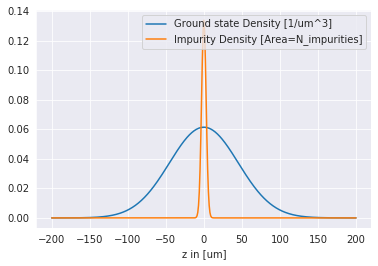

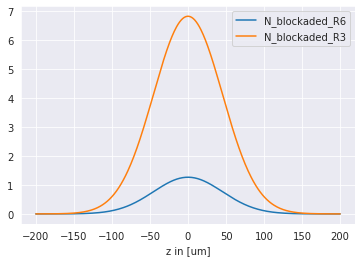

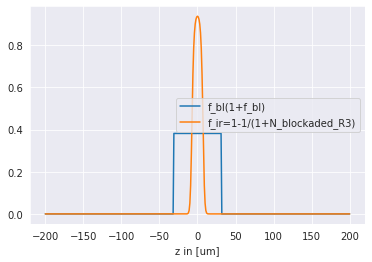

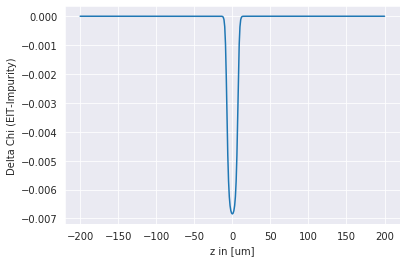

Alpha:  0.909581506890311
Minimum Counts with Impurity:  449.38039834747474
Minimum Counts with EIT:  494.0518193733096


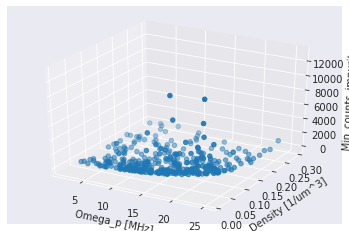

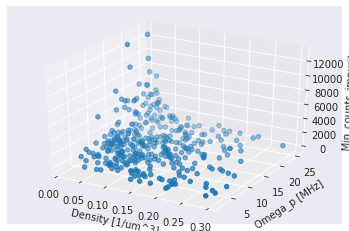

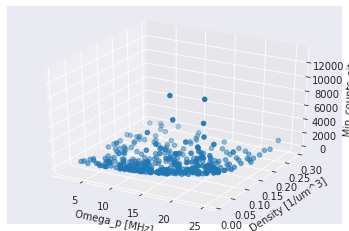

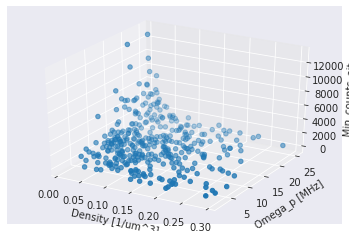

In [2]:
plt.plot(a.z_grid,a.ground_state_density(),label='Ground state Density [1/um^3]')
plt.plot(a.z_grid,a.impurity_density(),label='Impurity Density [Area=N_impurities]')
plt.legend()
plt.xlabel("z in [um]")
plt.show()

plt.plot(a.z_grid,a.N_bl_6(),label='N_blockaded_R6')
plt.plot(a.z_grid,a.N_bl_3(),label='N_blockaded_R3')
plt.legend()
plt.xlabel("z in [um]")
plt.show()

plt.plot(a.z_grid,a.f_bl(),label='f_bl(1+f_bl)')
plt.plot(a.z_grid,a.f_ir(),label='f_ir=1-1/(1+N_blockaded_R3)')
plt.legend()
plt.xlabel("z in [um]")
plt.show()

plt.plot(a.z_grid,a.integrand())
plt.ylabel("Delta Chi (EIT-Impurity)")
plt.xlabel("z in [um]")
plt.show()


print("Alpha: " ,a.alpha())
print("Minimum Counts with Impurity: ", a.min_counts_i())
print("Minimum Counts with EIT: ", a.min_counts_e())

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(a.Omega_p_list,a.n_0_list,a.min_counts_i_list,cmap='afmhot')

ax.set_xlabel('Omega_p [MHz]')
ax.set_ylabel('Density [1/um^3]')
ax.set_zlabel('Min_counts_impurity')

plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(a.n_0_list,a.Omega_p_list, a.min_counts_i_list,cmap='afmhot')


ax.set_xlabel('Density [1/um^3]')
ax.set_ylabel('Omega_p [MHz]')
ax.set_zlabel('Min_counts_impurity')

plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(a.Omega_p_list,a.n_0_list,a.min_counts_e_list,cmap='afmhot')


ax.set_xlabel('Omega_p [MHz]')
ax.set_ylabel('Density [1/um^3]')
ax.set_zlabel('Min_counts_eit')

plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(a.n_0_list,a.Omega_p_list, a.min_counts_e_list,cmap='afmhot')


ax.set_xlabel('Density [1/um^3]')
ax.set_ylabel('Omega_p [MHz]')
ax.set_zlabel('Min_counts_eit')

plt.show()

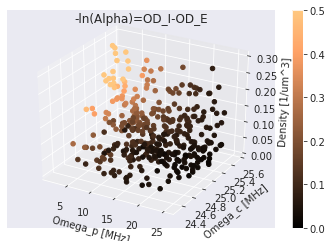

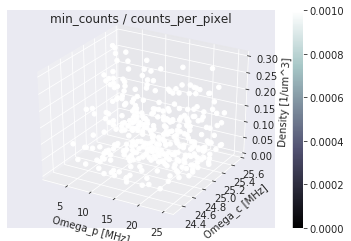

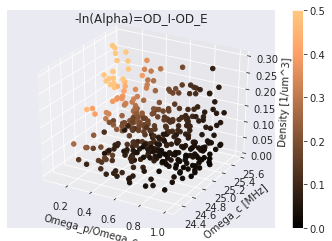

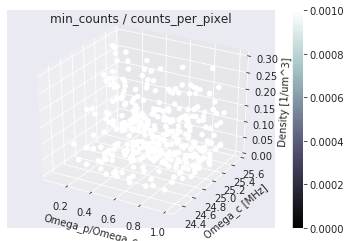

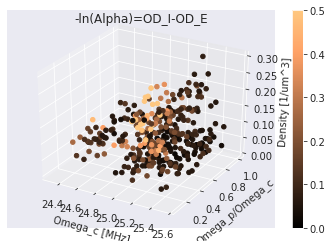

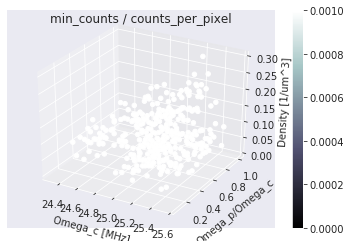

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = a.Omega_p_list
y = a.Omega_c_list
z = a.n_0_list
c = a.alpha_list

ax.set_xlabel('Omega_p [MHz]')
ax.set_ylabel('Omega_c [MHz]')
ax.set_zlabel('Density [1/um^3]')
ax.set_title('-ln(Alpha)=OD_I-OD_E')

img = ax.scatter(x, y, z, c=c, cmap=plt.copper(),vmin=0,vmax=0.5,depthshade=False)
fig.colorbar(img)
plt.show()


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = a.Omega_p_list
y = a.Omega_c_list
z = a.n_0_list
c = a.min_counts_over_n_counts

ax.set_xlabel('Omega_p [MHz]')
ax.set_ylabel('Omega_c [MHz]')
ax.set_zlabel('Density [1/um^3]')
ax.set_title('min_counts / counts_per_pixel')

img = ax.scatter(x, y, z, c=c, cmap=plt.bone(),vmin=0,vmax=0.001,depthshade=False)
fig.colorbar(img)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = a.Omega_p_over_c_list
y = a.Omega_c_list
z = a.n_0_list
c = a.alpha_list

ax.set_xlabel('Omega_p/Omega_c')
ax.set_ylabel('Omega_c [MHz]')
ax.set_zlabel('Density [1/um^3]')
ax.set_title('-ln(Alpha)=OD_I-OD_E')

img = ax.scatter(x, y, z, c=c, cmap=plt.copper(),vmin=0,vmax=0.5,depthshade=False)
fig.colorbar(img)
plt.show()


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = a.Omega_p_over_c_list
y = a.Omega_c_list
z = a.n_0_list
c = a.min_counts_over_n_counts

ax.set_xlabel('Omega_p/Omega_c')
ax.set_ylabel('Omega_c [MHz]')
ax.set_zlabel('Density [1/um^3]')
ax.set_title('min_counts / counts_per_pixel')

img = ax.scatter(x, y, z, c=c, cmap=plt.bone(),vmin=0,vmax=0.001,depthshade=False)
fig.colorbar(img)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

y = a.Omega_p_over_c_list
x = a.Omega_c_list
z = a.n_0_list
c = a.alpha_list

ax.set_ylabel('Omega_p/Omega_c')
ax.set_xlabel('Omega_c [MHz]')
ax.set_zlabel('Density [1/um^3]')
ax.set_title('-ln(Alpha)=OD_I-OD_E')

img = ax.scatter(x, y, z, c=c, cmap=plt.copper(),vmin=0,vmax=0.5,depthshade=False)
fig.colorbar(img)
plt.show()


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

y = a.Omega_p_over_c_list
x = a.Omega_c_list
z = a.n_0_list
c = a.min_counts_over_n_counts

ax.set_ylabel('Omega_p/Omega_c')
ax.set_xlabel('Omega_c [MHz]')
ax.set_zlabel('Density [1/um^3]')
ax.set_title('min_counts / counts_per_pixel')

img = ax.scatter(x, y, z, c=c, cmap=plt.bone(),vmin=0,vmax=0.001,depthshade=False)
fig.colorbar(img)
plt.show()

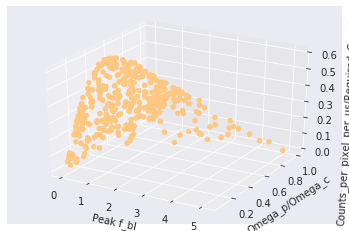

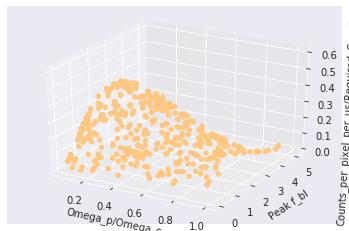

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
c=a.min_counts_over_n_counts
ax.scatter(a.peak_f_bl_list,a.Omega_p_over_c_list, a.min_counts_over_n_counts, c=c, cmap=plt.copper(),vmin=0,vmax=0.001,depthshade=False)


ax.set_xlabel('Peak f_bl')
ax.set_ylabel('Omega_p/Omega_c')
ax.set_zlabel('Counts_per_pixel_per_us/Required_Counts(SNR=1)')

plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(a.Omega_p_over_c_list,a.peak_f_bl_list, a.min_counts_over_n_counts, c=c, cmap=plt.copper(),vmin=0,vmax=0.001,depthshade=False)


ax.set_ylabel('Peak f_bl')
ax.set_xlabel('Omega_p/Omega_c')
ax.set_zlabel('Counts_per_pixel_per_us/Required_Counts(SNR=1)')

plt.show()

import plotly.io as pio
pio.renderers.default = "browser"
import plotly.graph_objects as go


fig = go.Figure(data=[go.Scatter3d(
    x=a.Omega_p_over_c_list,
    y=a.peak_f_bl_list,
    z=a.min_counts_over_n_counts,
    mode='markers',
    marker=dict(
        size=2,
        color=a.min_counts_over_n_counts,                # set color to an array/list of desired values
        colorscale='Cividis',   # choose a colorscale
        opacity=0.6
    )
)])

fig.update_layout(
    title=go.layout.Title(
        text="peak_f_bl (y) vs Omega_p/Omega_c (x)",
        xref="paper",
        x=0
    ),
    xaxis=go.layout.XAxis(
        title=go.layout.xaxis.Title(
            text="x Axis",
            font=dict(
                family="Courier New, monospace",
                size=18,
                color="#7f7f7f"
            )
        )
    ),
    yaxis=go.layout.YAxis(
        title=go.layout.yaxis.Title(
            text="y Axis",
            font=dict(
                family="Courier New, monospace",
                size=18,
                color="#7f7f7f"
            )
        )
    )
)


# tight layout
#fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()


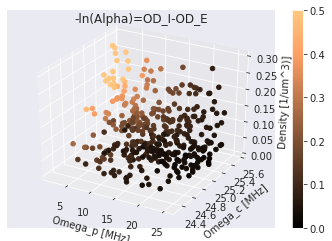

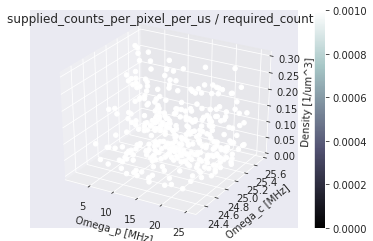

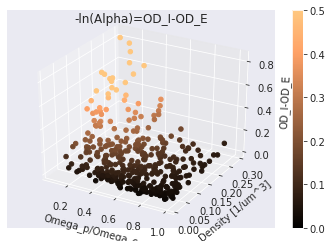

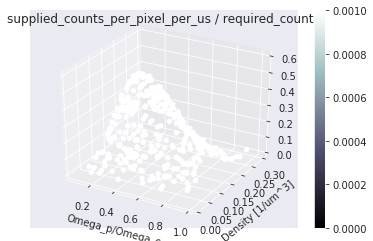

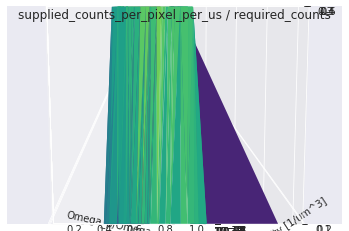

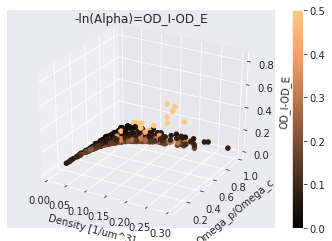

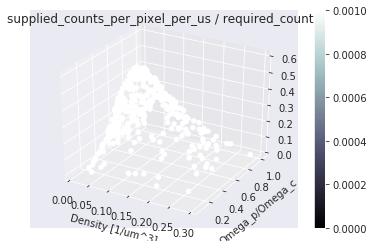

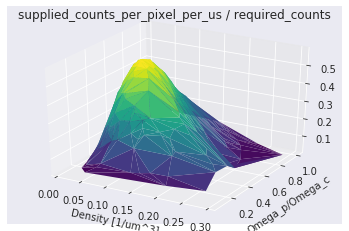

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = a.Omega_p_list
y = a.Omega_c_list
z = a.n_0_list
c = a.alpha_list

ax.set_xlabel('Omega_p [MHz]')
ax.set_ylabel('Omega_c [MHz]')
ax.set_zlabel('Density [1/um^3)]')
ax.set_title('-ln(Alpha)=OD_I-OD_E')

img = ax.scatter(x, y, z, c=c, cmap=plt.copper(),vmin=0,vmax=0.5,depthshade=False)
fig.colorbar(img)
plt.show()


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = a.Omega_p_list
y = a.Omega_c_list
z = a.n_0_list
c = a.min_counts_over_n_counts

ax.set_xlabel('Omega_p [MHz]')
ax.set_ylabel('Omega_c [MHz]')
ax.set_zlabel('Density [1/um^3]')
ax.set_title('supplied_counts_per_pixel_per_us / required_counts')

img = ax.scatter(x, y, z, c=c, cmap=plt.bone(),vmin=0,vmax=0.001,depthshade=False)
fig.colorbar(img)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = a.Omega_p_over_c_list
c = a.Omega_c_list
y = a.n_0_list
c = a.alpha_list
z = a.alpha_list

ax.set_xlabel('Omega_p/Omega_c')
ax.set_ylabel('Density [1/um^3]')
ax.set_zlabel('OD_I-OD_E')
ax.set_title('-ln(Alpha)=OD_I-OD_E')

img = ax.scatter(x, y, z, c=c, cmap=plt.copper(),vmin=0,vmax=0.5,depthshade=False)
fig.colorbar(img)
plt.show()


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = a.Omega_p_over_c_list
c = a.Omega_c_list
y = a.n_0_list
c = a.min_counts_over_n_counts
z = a.min_counts_over_n_counts

ax.set_xlabel('Omega_p/Omega_c')
ax.set_ylabel('Density [1/um^3]')
#ax.set_zlabel('Counts_per_pixel_per_us / Required_Counts_for_SNR1')
ax.set_title('supplied_counts_per_pixel_per_us / required_counts')

img = ax.scatter(x, y, z, c=c, cmap=plt.bone(),vmin=0,vmax=0.001,depthshade=False)
fig.colorbar(img)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z,
                cmap='viridis', edgecolor='none')
ax.set_yscale('log')
ax.set_ylabel('Density [1/um^3]')
ax.set_xlabel('Omega_p/Omega_c')
#ax.set_zlabel('Counts_per_pixel_per_us / Required_Counts_for_SNR1')
ax.set_title('supplied_counts_per_pixel_per_us / required_counts')
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

y = a.Omega_p_over_c_list
c = a.Omega_c_list
x = a.n_0_list
c = a.alpha_list
z = a.alpha_list

ax.set_ylabel('Omega_p/Omega_c')
ax.set_xlabel('Density [1/um^3]')
ax.set_zlabel('OD_I-OD_E')
ax.set_title('-ln(Alpha)=OD_I-OD_E')

img = ax.scatter(x, y, z, c=c, cmap=plt.copper(),vmin=0,vmax=0.5,depthshade=False)
fig.colorbar(img)
plt.show()


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

y = a.Omega_p_over_c_list
c = a.Omega_c_list
x = a.n_0_list
c = a.min_counts_over_n_counts
z = a.min_counts_over_n_counts

ax.set_ylabel('Omega_p/Omega_c')
ax.set_xlabel('Density [1/um^3]')
#ax.set_zlabel('Counts_per_pixel_per_us / Required_Counts_for_SNR1')
ax.set_title('supplied_counts_per_pixel_per_us / required_counts')

img = ax.scatter(x, y, z, c=c, cmap=plt.bone(),vmin=0,vmax=0.001,depthshade=False)
#ax.plot(x, z, 'r+', zdir='y', zs=1.1)
#ax.plot(y, z, 'g+', zdir='x', zs=0)
#ax.plot(x, y, 'k+', zdir='z', zs=-1)
fig.colorbar(img)


plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z,
                cmap='viridis', edgecolor='none')
ax.set_ylabel('Omega_p/Omega_c')
ax.set_xlabel('Density [1/um^3]')
#ax.set_zlabel('Counts_per_pixel_per_us / Required_Counts_for_SNR1')
ax.set_title('supplied_counts_per_pixel_per_us / required_counts')
plt.show()

In [6]:
import plotly.io as pio
pio.renderers.default = "browser"
import plotly.graph_objects as go


fig = go.Figure(data=[go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=2,
        color=z,                # set color to an array/list of desired values
        colorscale='Cividis',   # choose a colorscale
        opacity=0.6
    )
)])

fig.update_layout(
    title=go.layout.Title(
        text="Density (x) vs Omega_p/Omega_c (y)",
        xref="paper",
        x=0
    ),
    xaxis=go.layout.XAxis(
        title=go.layout.xaxis.Title(
            text="x Axis",
            font=dict(
                family="Courier New, monospace",
                size=18,
                color="#7f7f7f"
            )
        )
    ),
    yaxis=go.layout.YAxis(
        title=go.layout.yaxis.Title(
            text="y Axis",
            font=dict(
                family="Courier New, monospace",
                size=18,
                color="#7f7f7f"
            )
        )
    )
)


# tight layout
#fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()


